### Visualizing time series

#### Datetimes & time series

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(rc={'figure.figsize':(11,8)})

In [3]:
weather = pd.read_csv('pittsburgh2013.csv', parse_dates=['Date'], index_col='Date')
weather.columns.values

array(['Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF',
       'Max Dew PointF', 'Mean Dew PointF', 'Min DewpointF',
       'Max Humidity', 'Mean Humidity', 'Min Humidity',
       'Max Sea Level PressureIn', 'Mean Sea Level PressureIn',
       'Min Sea Level PressureIn', 'Max VisibilityMiles',
       'Mean VisibilityMiles', 'Min VisibilityMiles', 'Max Wind SpeedMPH',
       'Mean Wind SpeedMPH', 'Max Gust SpeedMPH', 'PrecipitationIn',
       ' CloudCover', 'Events', 'WindDirDegrees'], dtype=object)

In [4]:
type(weather.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [5]:
weather = weather[['Mean TemperatureF', 'Mean Dew PointF', 'Mean Sea Level PressureIn']]
weather.columns = [['Temperature', 'DewPoint', 'Pressure']]
weather.head()

,Temperature,DewPoint,Pressure
Date,,,
2013-01-01,28,27,30.01
2013-01-02,21,12,30.18
2013-01-03,24,15,30.21
2013-01-04,28,19,30.21
2013-01-05,30,20,30.30


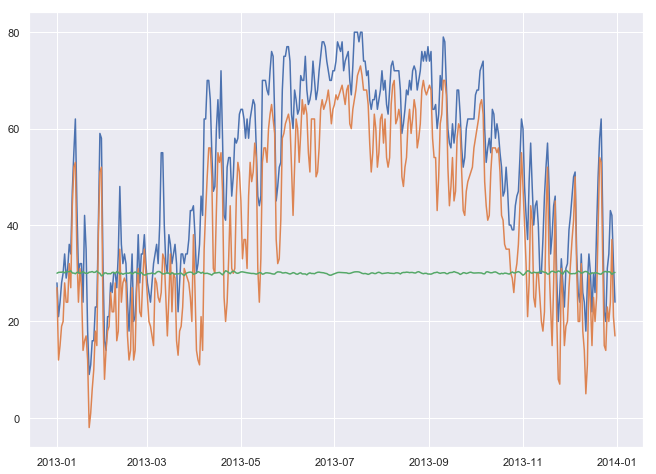

In [6]:
plt.plot(weather);

### Time series 
- Pandas time series: datetime as index
- Datetime: represents periods or time-stamps
- Datetime index: specialized slicing
 - eg, `weather['2013-07-04']`
 - eg, `weather['2013-03':'2013-04']`
 - eg, `weather['2010-05']`

In [7]:
temperature = weather['Temperature']
march_apr = temperature['2013-03':'2013-04']
march_apr.shape

(61, 1)

In [8]:
march_apr.iloc[-4:]

,Temperature
Date,
2013-04-27,58
2013-04-28,57
2013-04-29,58
2013-04-30,63


In [9]:
jan = temperature['2013-01']
dates = jan.index[::4]
labels = list(dates.strftime('%b %d'))
labels

['Jan 01',
 'Jan 05',
 'Jan 09',
 'Jan 13',
 'Jan 17',
 'Jan 21',
 'Jan 25',
 'Jan 29']

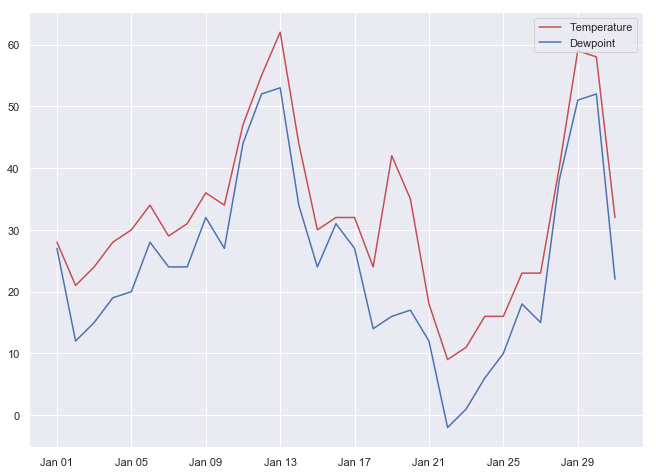

In [10]:
plt.plot(temperature['2013-01'], color='r', label='Temperature')
dew_point = weather['DewPoint']
plt.plot(dew_point['2013-01'], color='b', label='Dewpoint')
plt.legend(loc='upper right')
plt.xticks(jan.index[::4], labels)
plt.show()

In [16]:
stocks = pd.read_csv('stocks.csv', parse_dates=['Date'], index_col='Date')
aapl = stocks.AAPL
ibm = stocks.IBM
csco = stocks.CSCO
msft = stocks.MSFT

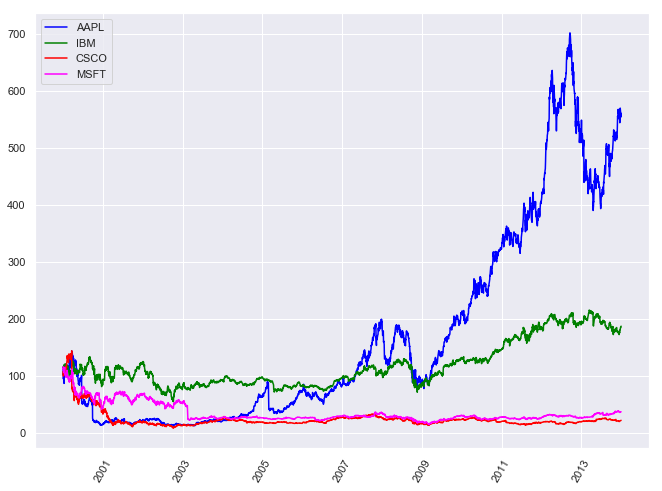

In [19]:
# Plot the aapl time series in blue
plt.plot(aapl, color='blue', label='AAPL')

# Plot the ibm time series in green
plt.plot(ibm, color='green', label='IBM')

# Plot the csco time series in red
plt.plot(csco, color='red', label='CSCO')

# Plot the msft time series in magenta
plt.plot(msft, color='magenta', label='MSFT')

# Add a legend in the top left corner of the plot
plt.legend(loc='upper left')

# Specify the orientation of the xticks
plt.xticks(rotation=60)

# Display the plot
plt.show()

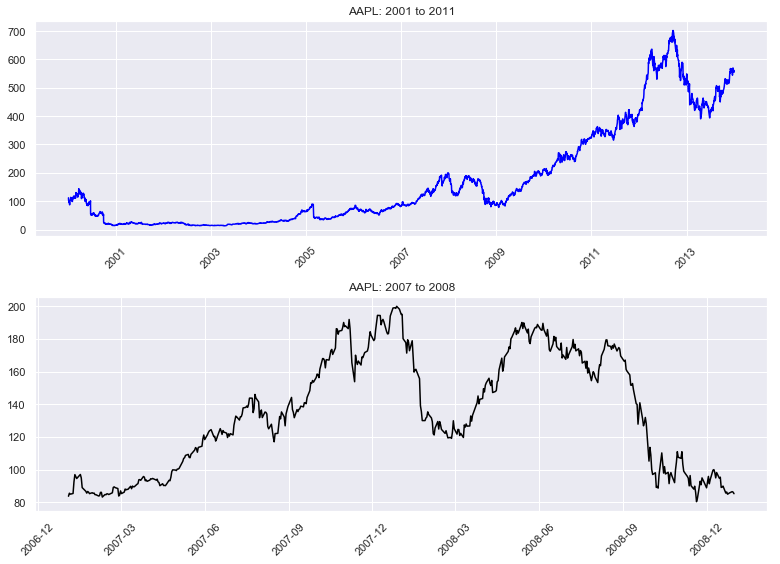

In [20]:
# Plot the series in the top subplot in blue
plt.subplot(2,1,1)
plt.xticks(rotation=45)
plt.title('AAPL: 2001 to 2011')
plt.plot(aapl, color='blue')

# Slice aapl from '2007' to '2008' inclusive: view
view = aapl['2007':'2008']

# Plot the sliced data in the bottom subplot in black
plt.subplot(2,1,2)
plt.xticks(rotation=45)
plt.title('AAPL: 2007 to 2008')
plt.plot(view, color='black')
plt.tight_layout()
plt.show()


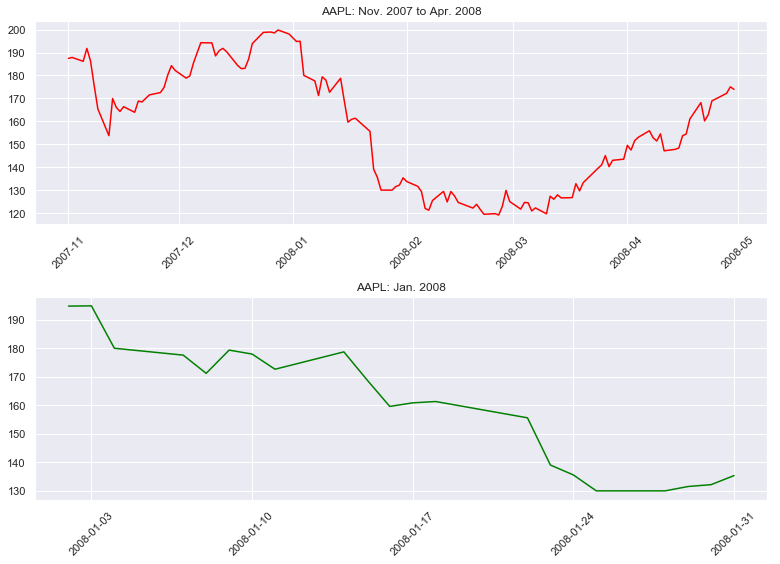

In [21]:
# Slice aapl from Nov. 2007 to Apr. 2008 inclusive: view
view = aapl['2007-11':'2008-04']

# Plot the sliced series in the top subplot in red
plt.subplot(2,1,1)
plt.plot(view, color='red')
plt.title('AAPL: Nov. 2007 to Apr. 2008')
plt.xticks(rotation=45)

# Reassign the series by slicing the month January 2008
view = aapl['2008-01']

# Plot the sliced series in the bottom subplot in green
plt.subplot(2,1,2)
plt.plot(view, color='green')
plt.title('AAPL: Jan. 2008')
plt.xticks(rotation=45)

# Improve spacing and display the plot
plt.tight_layout()
plt.show()


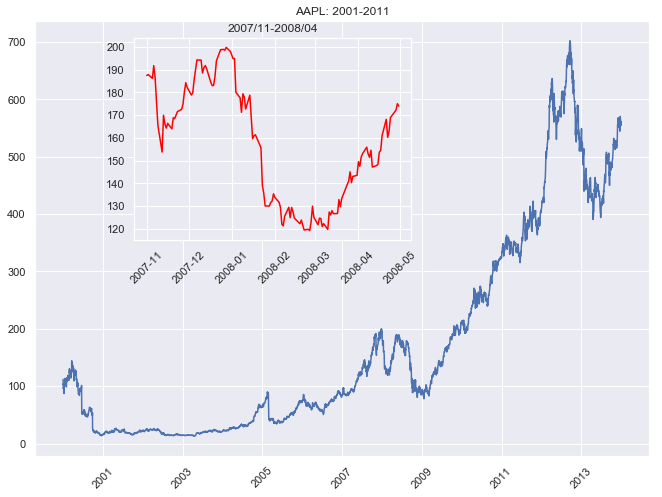

In [22]:
# Slice aapl from Nov. 2007 to Apr. 2008 inclusive: view
view = aapl['2007-11':'2008-04']

# Plot the entire series 
plt.plot(aapl)
plt.xticks(rotation=45)
plt.title('AAPL: 2001-2011')

# Specify the axes
plt.axes([0.25,0.5,0.35,0.35])

# Plot the sliced series in red using the current axes
plt.plot(view, color='red')
plt.xticks(rotation=45)
plt.title('2007/11-2008/04')
plt.show()

### Time series with moving windows

#### Moving windows and time series
- Moving window calculations
 - Averages
 - Medians
 - Standard deviations 
- Extracts information on longer time scales

In [24]:
mean_30 = aapl.rolling(30).mean()
mean_75 = aapl.rolling(75).mean()
mean_125 = aapl.rolling(125).mean()
mean_250 = aapl.rolling(250).mean()

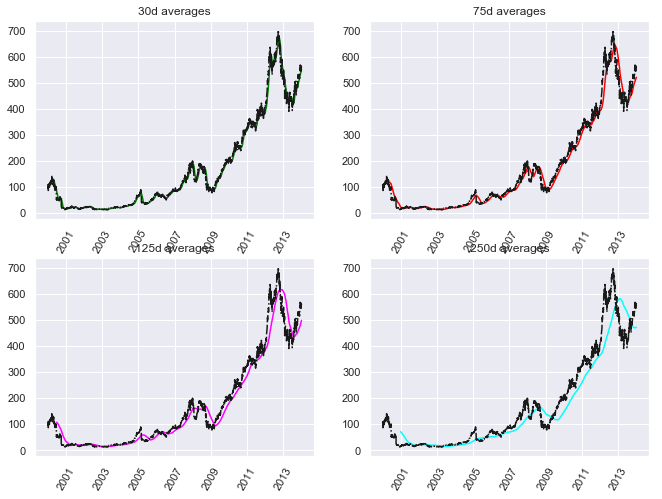

In [26]:
# Plot the 30-day moving average in the top left subplot in green
plt.subplot(2,2,1)
plt.plot(mean_30, 'green')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('30d averages')

# Plot the 75-day moving average in the top right subplot in red
plt.subplot(2,2,2)
plt.plot(mean_75, 'red')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('75d averages')

# Plot the 125-day moving average in the bottom left subplot in magenta
plt.subplot(2, 2, 3)
plt.plot(mean_125, 'magenta')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('125d averages')

# Plot the 250-day moving average in the bottom right subplot in cyan
plt.subplot(2,2,4)
plt.plot(mean_250, 'cyan')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('250d averages')

# Display the plot
plt.show()


In [27]:
std_30 = aapl.rolling(30).std()
std_75 = aapl.rolling(75).std()
std_125 = aapl.rolling(125).std()
std_250 = aapl.rolling(250).std()

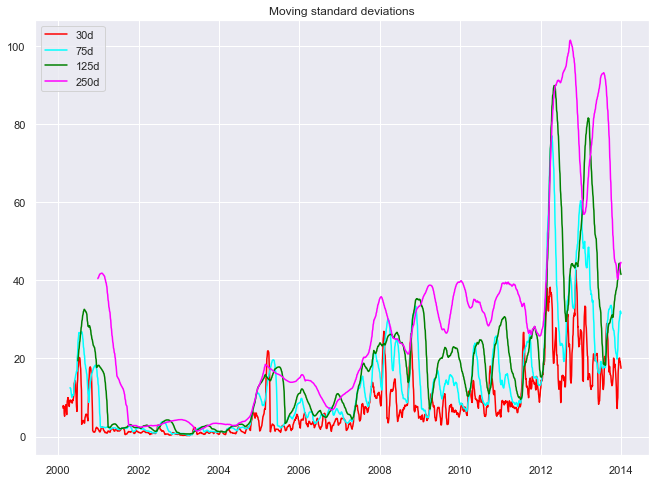

In [29]:
# Plot std_30 in red
plt.plot(std_30, 'red', label='30d')

# Plot std_75 in cyan
plt.plot(std_75, 'cyan', label='75d')

# Plot std_125 in green
plt.plot(std_125, 'green', label='125d')

# Plot std_250 in magenta
plt.plot(std_250, 'magenta', label='250d')

# Add a legend to the upper left
plt.legend(loc='upper left')

# Add a title
plt.title('Moving standard deviations')

# Display the plot
plt.show()